# Insights into Forest Fires

## Loading libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut, train_test_split
import math
import numpy as np
import random

import warnings

# Supressing the warning on the usage of Linear Regression model
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Working with the dataset

### Loading the dataset

The attributes in the dataset include:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec"
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

In [2]:
forest_fires = pd.read_csv('forest_fires.csv')
forest_fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


### Converting the labels under month and day to integers

In [3]:
forest_fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

forest_fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

### Statistical analysis of dataset

In [4]:
forest_fires.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Corelation analysis for the dataset

In [5]:
forest_fires.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


### Extracting features from the dataset

In [6]:
x_values = list(forest_fires['X'])
y_values = list(forest_fires['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []

    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

In [7]:
month_values = list(forest_fires['month'])
day_values = list(forest_fires['day'])

ffmc_values = list(forest_fires['FFMC'])
dmc_values = list(forest_fires['DMC'])
dc_values = list(forest_fires['DC'])
isi_values = list(forest_fires['ISI'])

temp_values = list(forest_fires['temp'])
rh_values = list(forest_fires['RH'])
wind_values = list(forest_fires['wind'])
rain_values = list(forest_fires['rain'])

area_values = list(forest_fires['area'])

In [8]:
attribute_list = []

for index in range(0, len(x_values)):
    temp_list = []
    
    temp_list.append(x_values[index])
    temp_list.append(y_values[index])
    
    temp_list.append(month_values[index])
    temp_list.append(day_values[index])

    temp_list.append(ffmc_values[index])
    temp_list.append(dmc_values[index])
    temp_list.append(dc_values[index])
    temp_list.append(isi_values[index])

    temp_list.append(temp_values[index])
    temp_list.append(rh_values[index])
    temp_list.append(wind_values[index])
    temp_list.append(rain_values[index])
    
    attribute_list.append(temp_list)

### Counting the instances of location points in dataset

In [9]:
def count_points(x_points, y_points, scaling_factor):
    count_array = []
    
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )

    return count_array

### Histogram plotting function for dataset

In [10]:
def histogram_plot(dataset, title):
    plt.figure(figsize=(10, 7.5))    
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.title(title, fontsize = 22)
    plt.hist(dataset, edgecolor='black', linewidth=1.2)

### Scatter plot for the locations

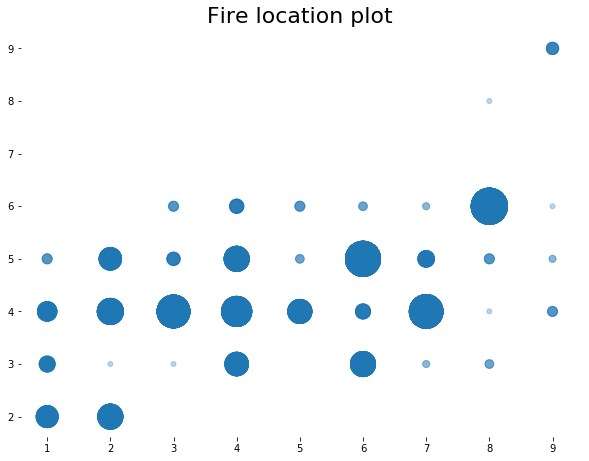

In [11]:
plt.figure(figsize=(10, 7.5))    
    
ax = plt.subplot()    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
    
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left() 
    
plt.title("Fire location plot", fontsize = 22)
plt.scatter(x_values, y_values, s = count_points(x_values, y_values, 25), alpha = 0.3)

### Plotting the distribution of values for the dataset

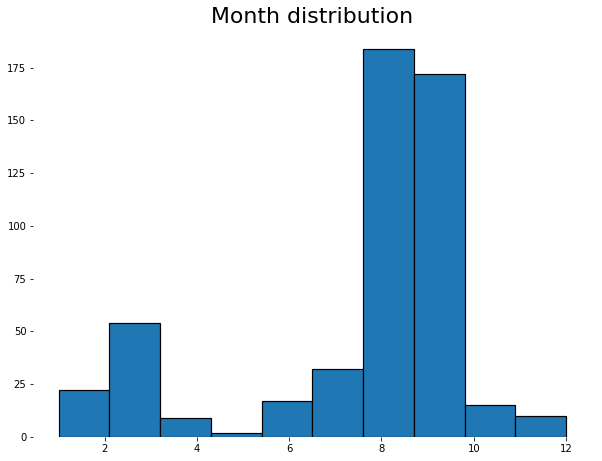

In [12]:
histogram_plot(month_values, title = "Month distribution")

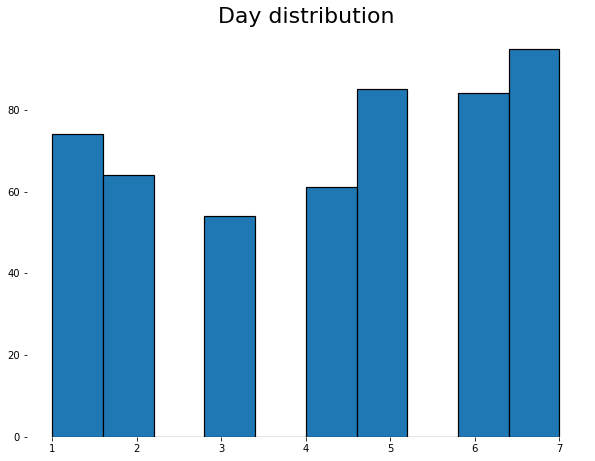

In [13]:
histogram_plot(day_values, title = "Day distribution")

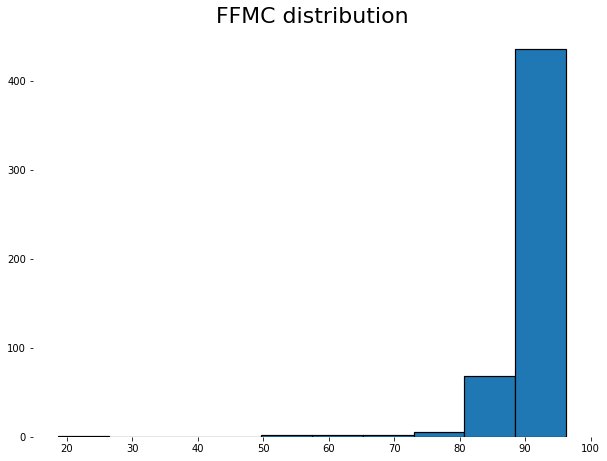

In [14]:
histogram_plot(ffmc_values, title = "FFMC distribution")

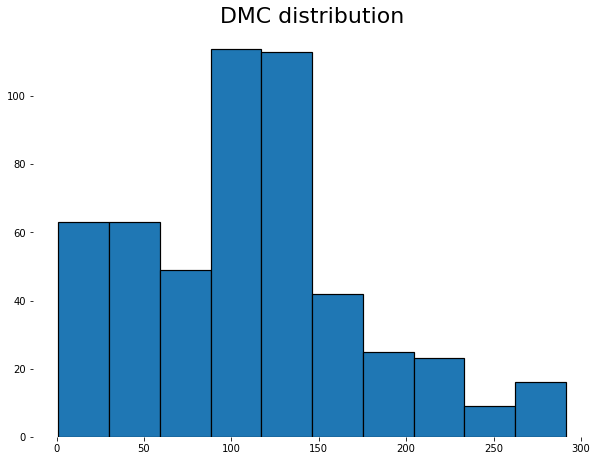

In [15]:
histogram_plot(dmc_values, title = "DMC distribution")

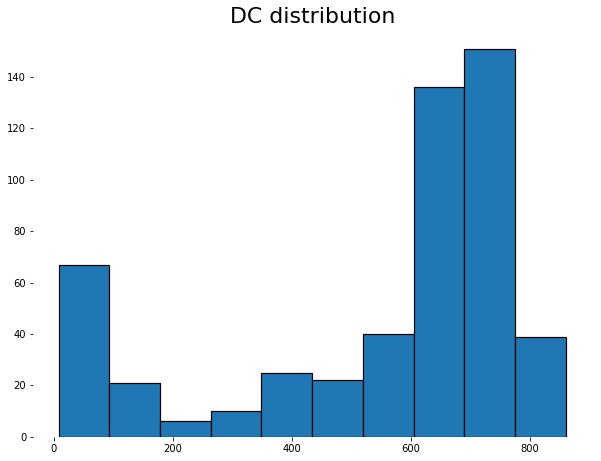

In [16]:
histogram_plot(dc_values, title = "DC distribution")

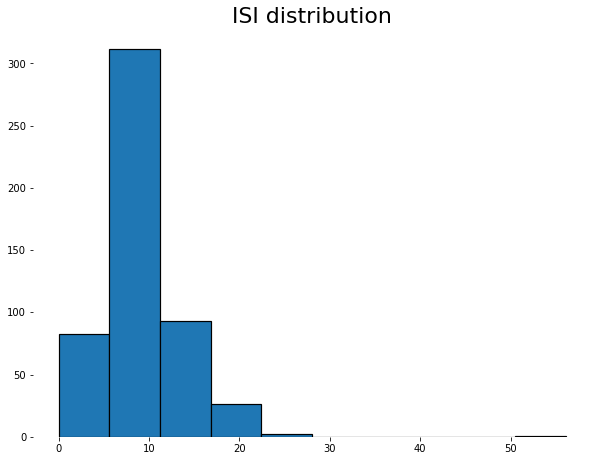

In [17]:
histogram_plot(isi_values, title = "ISI distribution")

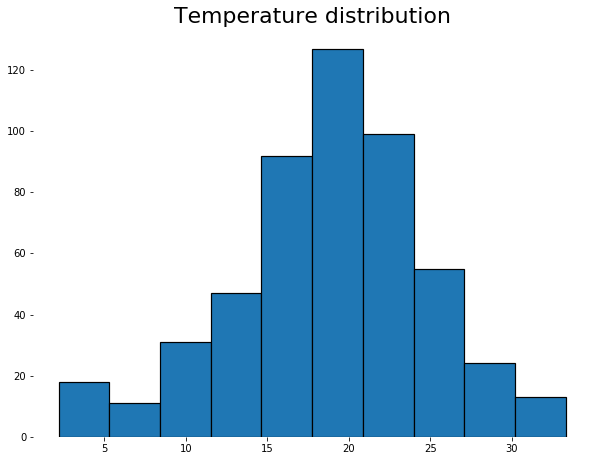

In [18]:
histogram_plot(temp_values, title = "Temperature distribution")

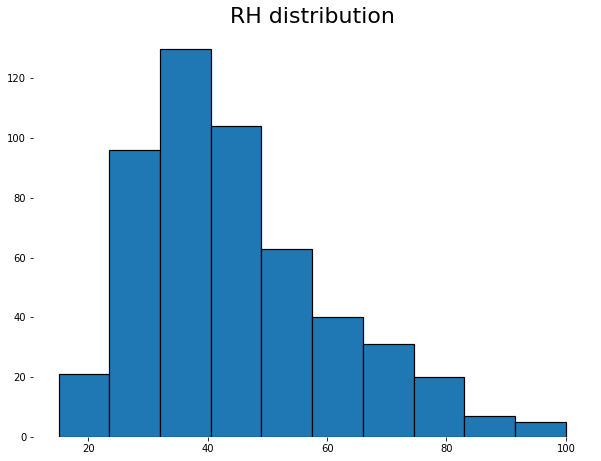

In [19]:
histogram_plot(rh_values, title = "RH distribution")

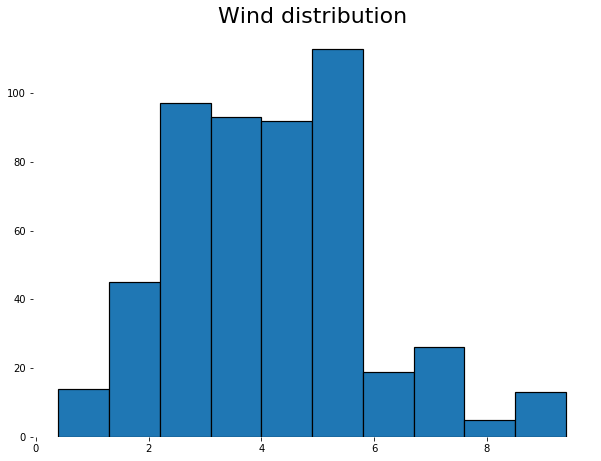

In [20]:
histogram_plot(wind_values, title = "Wind distribution")

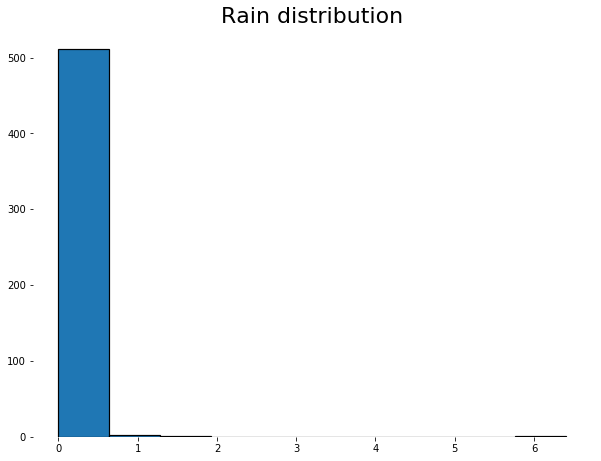

In [21]:
histogram_plot(rain_values, title = "Rain distribution")

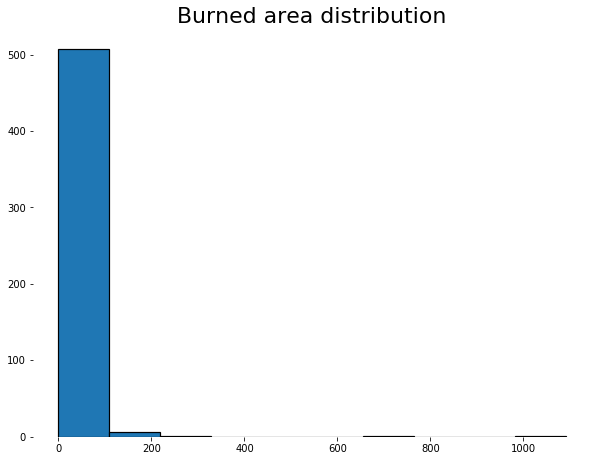

In [22]:
histogram_plot(area_values, title = "Burned area distribution")

## Gaining insights with learning models

### Linear regression model

In [23]:
linear_regression = linear_model.LinearRegression()
train_x, test_x, train_y, test_y = train_test_split(attribute_list, area_values, test_size=0.2, random_state=8)

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

print("\nThe actual output and the predicted output are:")
for value in range(0, len(predicted_y)):
    print(test_y[value], "\t", predicted_y[value])

Coefficients: 
 [  2.06103196   0.90113965   3.10021987   0.79541289  -0.13850386
   0.10157637  -0.03243543  -0.6671539    0.99714905  -0.21896593
   1.70483853 -18.51960259]

Mean squared error:  688.9087832778877
Variance score: -0.28

The actual output and the predicted output are:
2.29 	 5.71981693241095
24.24 	 2.0596676806218106
17.2 	 21.07695418246237
3.63 	 32.94537033482412
0.33 	 0.22527932854025678
95.18 	 23.255006719934546
1.38 	 21.54411822322651
0.0 	 16.22316210785355
42.87 	 31.121755756282045
0.0 	 22.985085880265675
0.0 	 12.431765738441705
8.12 	 3.902837723103236
24.23 	 13.868270373327736
6.57 	 12.91579963196995
9.77 	 24.946911657353713
0.0 	 18.62482060369216
16.4 	 17.98853614329015
28.19 	 3.9946911570266117
0.0 	 18.895761120204266
0.0 	 17.488620056743326
0.0 	 11.58083970625977
0.0 	 17.383923077607495
0.0 	 9.274352679911765
0.0 	 7.849451790061899
0.0 	 18.411138528437373
0.0 	 12.159702227113424
10.82 	 -94.69872300035313
1.64 	 8.376021346648407
0.0 

### Leave-One-Out validation

In [24]:
leave_one_out = LeaveOneOut()
total_squared_error = 0
total_r2_score = 0
total_loops = 0

for train_index, test_index in leave_one_out.split(attribute_list):
    train_attributes = []
    train_outputs = []
    test_attributes = []
    actual_outputs = []
    
    for value in train_index:
        train_attributes.append(attribute_list[value])
        train_outputs.append(area_values[value])
    
    for value in test_index:
        test_attributes.append(attribute_list[value])
        actual_outputs.append(area_values[value])
    
    predicted_output = linear_regression.predict(test_attributes)
    
    total_squared_error = total_squared_error + mean_squared_error(actual_outputs, predicted_output)
    total_r2_score = total_r2_score + r2_score(actual_outputs, predicted_output)
    total_loops = total_loops + 1
    
print("The mean of sqaured errors is: ", (total_squared_error)/total_loops)
print("The mean of variance score is: ", (total_r2_score)/total_loops)

The mean of sqaured errors is:  3970.09273645394
The mean of variance score is:  0.0


## Applyting Log-Transformation to the variables

We can see that the errors in the prediction of burned areas from the given dataset is very high in the above mentioned model. A reason for this could be the high skewness of the 'Burned Area' variable is towards zero.

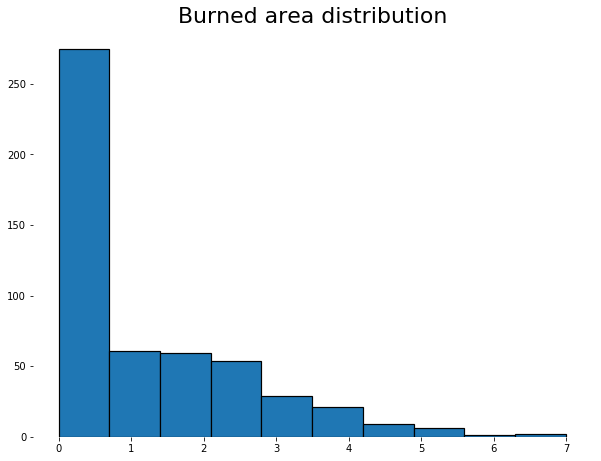

In [25]:
area_values = list(np.log(np.array(area_values) + 1))
histogram_plot(area_values, title = "Burned area distribution")

## Applying learning models on the processed data

### Linear regression model

In [26]:
linear_regression = linear_model.LinearRegression()
train_x, test_x, train_y, test_y = train_test_split(attribute_list, area_values, test_size=0.2, random_state=8)

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

# Coverting the values back to normal form by exponential operation
test_y = np.exp(np.array(test_y))
predicted_y = np.exp(np.array(predicted_y))

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

print("\nThe actual output and the predicted output are:")
for value in range(0, len(predicted_y)):
    if(test_y[value] == 1):
        print(test_y[value], "\t\t\t", predicted_y[value])
    else:
        print(test_y[value], "\t", predicted_y[value])

Coefficients: 
 [ 3.70578857e-02 -9.81429614e-03  1.87193353e-01  2.40097791e-02
  2.69274794e-03  2.27929887e-03 -1.58010516e-03 -2.30555283e-02
  2.00195793e-02 -6.21143873e-06  6.46153774e-02 -9.74429391e-01]

Mean squared error:  575.066482471313
Variance score: -0.07

The actual output and the predicted output are:
3.29 	 2.257260819217366
25.239999999999995 	 2.2527688492391333
18.2 	 3.3817568828931597
4.63 	 4.312440914144927
1.33 	 2.4407684183688425
96.18000000000004 	 3.6185342164630914
2.38 	 3.0458150634263004
1.0 			 3.669655759865629
43.86999999999999 	 3.9108592004834932
1.0 			 4.76235203673913
1.0 			 2.8464550466148433
9.120000000000001 	 2.3294345810520665
25.230000000000004 	 3.427167541391069
7.570000000000001 	 3.2005389924782426
10.770000000000001 	 8.418025483837987
1.0 			 3.1918310004841164
17.4 	 3.003827374953999
29.190000000000005 	 2.2347757422871375
1.0 			 3.94004104166972
1.0 			 3.5285553912508463
1.0 			 2.6100577019315736
1.0 			 3.9234018074937724


The mean squared error has reduced due to the usage of the log transformation but the variance score shows us that the model is not performing well.

## Normalisation of all data

In [27]:
n_x_values = preprocessing.normalize([x_values])[0]
n_y_values = preprocessing.normalize([y_values])[0]

n_month_values = preprocessing.normalize([month_values])[0]
n_day_values = preprocessing.normalize([day_values])[0]

n_ffmc_values = preprocessing.normalize([ffmc_values])[0]
n_dmc_values = preprocessing.normalize([dmc_values])[0]
n_dc_values = preprocessing.normalize([dc_values])[0]
n_isi_values = preprocessing.normalize([isi_values])[0]

n_temp_values = preprocessing.normalize([temp_values])[0]
n_rh_values = preprocessing.normalize([rh_values])[0]
n_wind_values = preprocessing.normalize([wind_values])[0]
n_rain_values = preprocessing.normalize([rain_values])[0]

n_area_values = preprocessing.normalize([area_values])[0]
n_attribute_list = []

for index in range(0, len(n_x_values)):
    temp_list = []
    
    # Some of the features are not being added to test 
    # out the accuracy with different set ofattributes
    
    #temp_list.append(n_x_values[index])
    #temp_list.append(n_y_values[index])
    
    #temp_list.append(n_month_values[index])
    #temp_list.append(n_day_values[index])

    temp_list.append(n_ffmc_values[index])
    temp_list.append(n_dmc_values[index])
    temp_list.append(n_dc_values[index])
    temp_list.append(n_isi_values[index])

    temp_list.append(n_temp_values[index])
    temp_list.append(n_rh_values[index])
    temp_list.append(n_wind_values[index])
    #temp_list.append(n_rain_values[index])
    
    n_attribute_list.append(temp_list)

## Applying learning models on the processed data

### Linear Regression

In [28]:
linear_regression = linear_model.LinearRegression()
train_x, test_x, train_y, test_y = train_test_split(n_attribute_list, n_area_values, test_size=0.33, random_state=8)

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

# Coverting the values back to normal form by exponential operation
test_y = np.exp(np.array(test_y))
predicted_y = np.exp(np.array(predicted_y))

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

print("\nThe actual output and the predicted output are:")
for value in range(0, len(predicted_y)):
    if(test_y[value] == 1):
        print(test_y[value], "\t\t\t", predicted_y[value])
    else:
        print(test_y[value], "\t", predicted_y[value])

Coefficients: 
 [ 0.61035755 -0.04973701  0.15706817 -0.12075831  0.17773282 -0.01148486
  0.18697752]

Mean squared error:  0.001323441749504678
Variance score: 0.01

The actual output and the predicted output are:
1.0297765775273005 	 1.0224356643633126
1.08279337745097 	 1.0263944812093833
1.0741043113423667 	 1.0278999545053298
1.0384821070592352 	 1.0301092095285993
1.007051167813593 	 1.028280965750839
1.1190784550817374 	 1.032881335500394
1.0215940348945534 	 1.0242179412622674
1.0 			 1.0306771496108433
1.0976422011838627 	 1.0277430987558598
1.0 			 1.0339818729898427
1.0 			 1.031952318609138
1.0559733995692302 	 1.0280460523601407
1.0827828054522428 	 1.030309458126547
1.051138000811222 	 1.0261259083559897
1.0603088907136868 	 1.03210040162524
1.0 			 1.029617592852933
1.0729153546870864 	 1.027175340682923
1.086679294780838 	 1.0293902287950187
1.0 			 1.0288816056568204
1.0 			 1.0303636446616107
1.0 			 1.028313869879663
1.0 			 1.0351397614672553
1.0 			 1.031182021053

## Down-sampling the majority class

### Percentage of data with the majority value

In [29]:
area_values = list(area_values)
majority_count = 0

for value in area_values:
    if(value == 0):
        majority_count = majority_count + 1

print(majority_count/len(area_values))

0.47775628626692457
